In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Info files for transcript ID for each circadian gene

In [2]:
info = pd.read_csv('ClockGene_MW_transcript_map.csv', index_col=1)
info
# Delete timeless  -  do not have DE for it now
#info = info[info.Clock_Gene!='Timeless']
info

,Clock_Gene
MW_Trinity_Transcript,
TRINITY_DN59140_c0_g1,Cycle
TRINITY_DN2943_c0_g1,Clock
TRINITY_DN146_c0_g1,Period
TRINITY_DN7506_c0_g1,Timeless
TRINITY_DN2770_c0_g1,CRY1
TRINITY_DN308_c1_g1,CRY2


,logFC,logCPM,LR,PValue,FDR,Condition,Transcript_ID
TRINITY_DN59140_c0_g1,-0.810285,-1.253562,0.747675,0.387213,0.999795,no pulse,Cycle
TRINITY_DN2943_c0_g1,-1.172211,2.674811,7.295425,0.006913,0.325963,no pulse,Clock
TRINITY_DN146_c0_g1,0.391068,5.659775,1.294087,0.255296,0.984829,no pulse,Period
TRINITY_DN7506_c0_g1,-0.026721,2.244998,0.005273,0.942114,0.999795,no pulse,Timeless
TRINITY_DN2770_c0_g1,-0.356769,2.103576,0.880231,0.348138,0.999795,no pulse,CRY1
TRINITY_DN308_c1_g1,-1.715367,3.276098,16.788238,0.000042,0.044670,no pulse,CRY2
TRINITY_DN59140_c0_g1,-0.411831,-0.521968,0.371211,0.542345,0.999909,pulse,Cycle
TRINITY_DN2943_c0_g1,-0.129887,2.842278,0.143783,0.704548,0.999909,pulse,Clock
TRINITY_DN146_c0_g1,0.559883,6.227864,2.612057,0.106054,0.656651,pulse,Period
TRINITY_DN7506_c0_g1,0.448676,2.830637,1.524517,0.216937,0.999909,pulse,Timeless


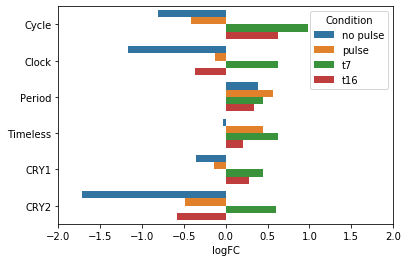

In [23]:
# Make dictionary whcih contains experimenal condition and file name associated with this condition
exp = {'no pulse':'no_pulse_DE_005.csv', 'pulse' :'pulse_DE_005.csv', 't7':'t7_DE.csv', 't16':'t16_DE.csv'}

# Make function which inport DE file for given experimenal condition and extract only transcripts from info file
def make_circ_df(df, condition, info):
    new_df = df.loc[info.index]
    new_df['Condition'] = condition
    new_df['Transcript_ID'] = info.loc[new_df.index].Clock_Gene
    return(new_df)
# Make a flat data frame which will contains all expression level together with experimenal condition
all_data = pd.DataFrame(data =[], columns = ['logFC', 'logCPM', 'LR', 'PValue', 'FDR'])
for condition in exp.keys():
    df = pd.read_csv(exp[condition], index_col=0)
    circ_df = make_circ_df(df, condition, info)
    all_data = pd.concat([all_data, circ_df], axis=0)
# Save the file with DE of all circadian genes in a .csv file
#all_data.to_csv('circadian_transcripts_DE.csv')

# Plot DE for all experimental conditions
sns.barplot(data = all_data, y = 'Transcript_ID' , x='logFC', hue = 'Condition' )
plt.ylabel('')
plt.xlim(-2, 2)
all_data

Text(0.5, 11.120000000000001, '')

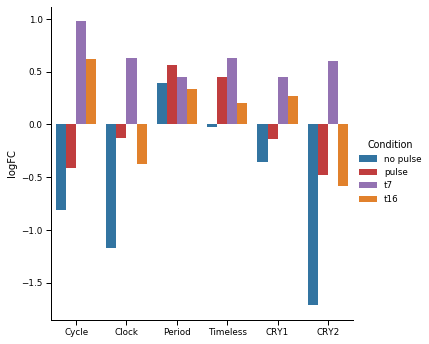

In [48]:
sns.catplot(data = all_data, x = 'Transcript_ID' , y='logFC', hue = 'Condition', kind="bar", palette=palette)
palette = {"no pulse":"tab:blue",
           "pulse":"tab:red", 
           "t7":"tab:black", 
          "t16":"tab:green",}
# 
plt.xlabel('')

# Making transcript abundance plot

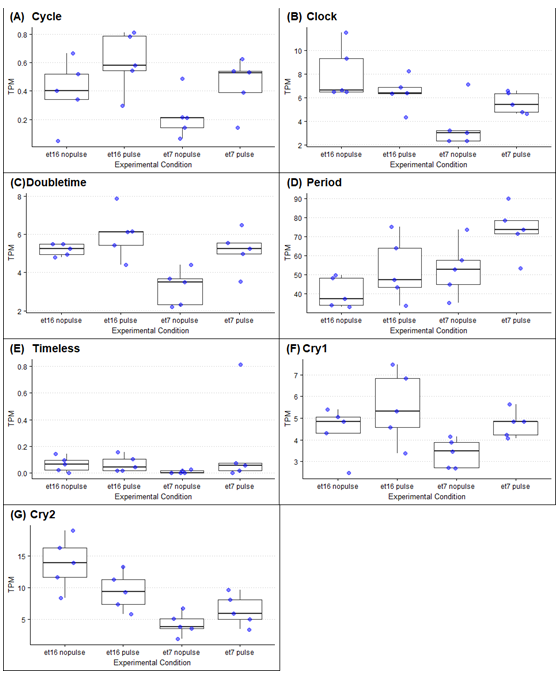

## Download TPM data set and extract only clock gene homologues

In [3]:
all_tr = pd.read_table('RSEM.gene.TMM.EXPR.matrix', index_col=0)
all_tr

,rsem_outdir_NAi13t3n2_S1,rsem_outdir_NAi13t3n14_S2,rsem_outdir_NAi13t3n26_S3,rsem_outdir_NAi13t3n27_S4,rsem_outdir_NAi13t3n31_S5,rsem_outdir_NAi6t3n1_S6,rsem_outdir_NAi6t3n10_S7,rsem_outdir_NAi6t3n16_S8,rsem_outdir_NAi6t3n24_S9,rsem_outdir_NAi6t3n29_S10,rsem_outdir_NAi13t12n7_S11,rsem_outdir_NAi13t12n10_S12,rsem_outdir_NAi13t12n11_S13,rsem_outdir_NAi13t12n16_S14,rsem_outdir_NAi13t12n19_S15,rsem_outdir_NAi6t12n3_S16,rsem_outdir_NAi6t12n4_S17,rsem_outdir_NAi6t12n18_S18,rsem_outdir_NAi6t12n23_S19,rsem_outdir_NAi6t12n27_S20
TRINITY_DN0_c0_g1,756.624,906.464,307.957,739.130,206.390,154.113,220.125,554.147,317.122,183.428,125.687,403.675,1387.289,470.699,401.953,534.054,420.981,509.926,603.937,374.140
TRINITY_DN0_c13_g1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
TRINITY_DN0_c1_g1,357.557,352.441,211.422,268.329,205.709,247.210,346.917,252.998,325.901,216.055,157.471,224.673,429.794,145.129,164.364,240.231,204.186,263.276,249.055,293.112
TRINITY_DN0_c1_g2,1.100,1.022,1.040,1.243,1.052,1.458,0.378,0.503,1.320,1.470,0.410,1.034,1.657,0.949,1.143,0.814,0.866,0.716,1.038,1.163
TRINITY_DN0_c2_g1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRINITY_DN99_c0_g2,218.924,308.579,256.265,181.552,390.274,489.486,269.915,59.978,100.502,268.115,435.670,291.561,355.563,542.176,314.387,301.018,239.768,287.311,304.533,222.357
TRINITY_DN9_c0_g1,0.328,0.469,0.350,0.928,0.852,1.140,1.070,0.781,0.587,0.830,1.268,0.526,0.223,3.738,1.554,1.240,0.813,1.083,1.081,0.618
TRINITY_DN9_c1_g1,2865.661,466.216,1169.269,1149.611,695.566,780.378,1473.277,2065.696,2387.134,961.238,3282.097,2729.390,505.870,1428.169,1677.924,1818.299,2331.295,893.646,1070.918,4503.593
TRINITY_DN9_c1_g2,0.582,1.408,1.192,0.696,0.291,0.197,0.209,1.105,0.598,0.670,0.477,0.834,0.517,1.121,0.884,0.672,0.679,0.629,0.583,0.267


### Add clock gene homologe as a column

In [5]:
clock_counts = all_tr.loc[info.index.tolist(),:]
for id in clock_counts.index:
    clock_counts.loc[id, 'Clock_Gene'] = info.loc[id, 'Clock_Gene']
clock_counts

,rsem_outdir_NAi13t3n2_S1,rsem_outdir_NAi13t3n14_S2,rsem_outdir_NAi13t3n26_S3,rsem_outdir_NAi13t3n27_S4,rsem_outdir_NAi13t3n31_S5,rsem_outdir_NAi6t3n1_S6,rsem_outdir_NAi6t3n10_S7,rsem_outdir_NAi6t3n16_S8,rsem_outdir_NAi6t3n24_S9,rsem_outdir_NAi6t3n29_S10,...,rsem_outdir_NAi13t12n10_S12,rsem_outdir_NAi13t12n11_S13,rsem_outdir_NAi13t12n16_S14,rsem_outdir_NAi13t12n19_S15,rsem_outdir_NAi6t12n3_S16,rsem_outdir_NAi6t12n4_S17,rsem_outdir_NAi6t12n18_S18,rsem_outdir_NAi6t12n23_S19,rsem_outdir_NAi6t12n27_S20,Clock_Gene
TRINITY_DN59140_c0_g1,0.539,0.626,0.388,0.529,0.140,0.066,0.143,0.485,0.214,0.210,...,0.544,0.811,0.785,0.580,0.663,0.518,0.339,0.403,0.048,Cycle
TRINITY_DN2943_c0_g1,6.587,4.787,5.429,6.364,4.629,2.313,3.026,7.103,2.347,3.231,...,6.882,6.403,8.245,6.348,11.521,6.491,6.499,9.345,6.615,Clock
TRINITY_DN146_c0_g1,89.934,73.510,78.337,71.424,53.499,45.052,35.259,73.718,57.546,52.881,...,43.549,63.915,75.042,47.430,48.148,37.350,34.132,49.809,33.063,Period
TRINITY_DN7506_c0_g1,7.116,5.704,10.074,6.512,4.148,3.223,3.274,6.744,3.904,4.211,...,6.383,4.382,5.995,4.661,4.714,4.464,3.598,4.397,4.628,Timeless
TRINITY_DN2770_c0_g1,4.853,4.839,4.067,5.631,4.219,2.686,2.726,3.475,4.152,3.891,...,4.588,3.384,7.468,6.822,5.396,5.063,4.314,4.853,2.472,CRY1
TRINITY_DN308_c1_g1,4.990,9.584,5.855,8.034,3.377,3.541,1.839,6.690,5.044,3.781,...,7.308,13.300,11.265,9.286,18.962,16.277,13.918,11.623,8.311,CRY2


## Functions to find experimental conditions

#### Extract pulse status

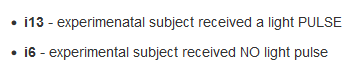

In [98]:
def get_pulse(long_name):
    name= long_name[12:]
    start = name.find('i')
    end  =name.find('t')
    pulse_name = name[start:end]
    if pulse_name =='i13':
         pulse_status = 'Pulse'
    elif pulse_name=='i6':
         pulse_status ='No Pulse'
    else:
         print('wired experimental pulse notation')
    return(pulse_status)
long_name = 'rsem_outdir_NAi6t12n3_S16'
get_pulse(long_name)                

'No Pulse'

#### Extract collection time

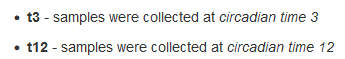

In [182]:

def get_time(long_name):
    name= long_name[12:]
    start = name.find('t')
    end  =name.find('n')
    pulse_name = name[start:end]
    
    if pulse_name =='t3':
        pulse_status = 'ET7'
    elif pulse_name=='t12':
        pulse_status ='ET16'
    else:
        print('wired experimental time')
    return(pulse_status)
long_name = 'rsem_outdir_NAi6t12n3_S16'
get_time(long_name)    

'ET16'

In [185]:
df = pd.DataFrame(columns=['Clock Gene', 'TPM', 'Pulse', 'Time'])
for name in clock_counts.index:
    line = clock_counts.loc[[name]]
    columns = line.columns[:-1]
    for exp in columns:
        id = line[exp]
        new_row = [line.iloc[0,-1], id[0],  get_pulse(exp), get_time(exp)  ]
        df.loc[len(df)] = new_row

df['Exp Conditions']= df.Time+' '+ df.Pulse
df.head(30)

,Clock Gene,TPM,Pulse,Time,Exp Conditions
0,Cycle,0.539,Pulse,ET7,ET7 Pulse
1,Cycle,0.626,Pulse,ET7,ET7 Pulse
2,Cycle,0.388,Pulse,ET7,ET7 Pulse
3,Cycle,0.529,Pulse,ET7,ET7 Pulse
4,Cycle,0.140,Pulse,ET7,ET7 Pulse
5,Cycle,0.066,No Pulse,ET7,ET7 No Pulse
6,Cycle,0.143,No Pulse,ET7,ET7 No Pulse
7,Cycle,0.485,No Pulse,ET7,ET7 No Pulse
8,Cycle,0.214,No Pulse,ET7,ET7 No Pulse
9,Cycle,0.210,No Pulse,ET7,ET7 No Pulse


## Summary of all clock genes figue

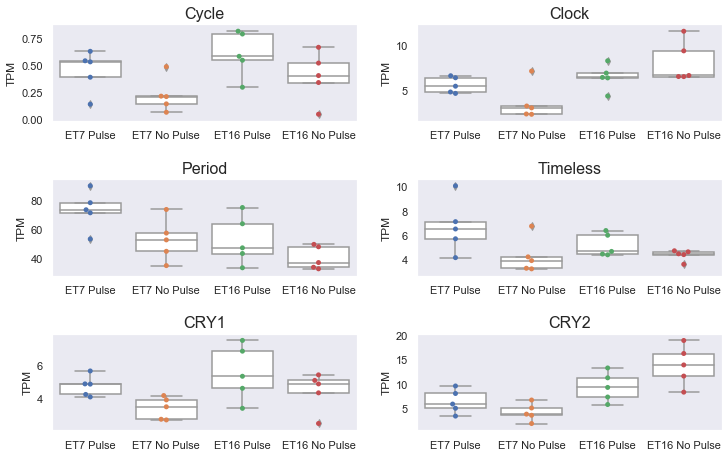

In [188]:
genes = df['Clock Gene'].unique()
nplots =len(genes)
i_plot = 1
plt.figure(figsize = (12,16))
#sns.set(style="darkgrid")
sns.set_style("dark")
for name in genes:
    df1 = df[df['Clock Gene'] == name]
    plt.subplot( nplots,2,  i_plot)
    plt.subplots_adjust(wspace = 0.2, hspace = 0.6)
    plt.title(name, fontsize =16)
    sns.boxplot(data =df1, x ='Exp Conditions', y = 'TPM', color='white')
    sns.swarmplot(data =df1, x ='Exp Conditions', y = 'TPM')
    plt.xlabel('')
    i_plot = i_plot + 1

    plt.savefig("Clock genes TPM.pdf", format="pdf", bbox_inches="tight")
plt.show()